<a href="https://colab.research.google.com/github/suwitchaya17/data_viz_2022/blob/main/ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [195]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import os

In [196]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [197]:
from google.colab import drive  #เชื่อม google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/seminar'   #pathจะชี้ไปยังโฟล์เดอร์

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [198]:
data = os.path.join(path,'RFM_kmeans.xlsx') #แล้วก็ชี้ไปที่ไฟล์
print(data)

/content/drive/My Drive/seminar/RFM_kmeans.xlsx


In [199]:
data_ex = pd.read_excel(data) 
data_ex

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-01 09:32:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-03 09:32:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-02-06 09:34:00,2.75,17850,United Kingdom
3,536366,22633,HAND WARMER UNION JACK,6,2010-02-06 15:28:00,1.85,17850,United Kingdom
4,536366,22632,HAND WARMER RED POLKA DOT,6,2010-02-07 08:28:00,1.85,17850,United Kingdom
5,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-04-11 08:34:00,9.95,13047,United Kingdom
6,536367,21754,HOME BUILDING BLOCK WORD,3,2010-04-15 08:34:00,5.95,13047,United Kingdom
7,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-04-17 08:34:00,4.95,13047,United Kingdom
8,536369,21756,BATH BUILDING BLOCK WORD,3,2010-04-17 08:35:00,5.95,13047,United Kingdom
9,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-05-12 08:45:00,2.95,12583,France


In [200]:
data1 =  data_ex.dropna()
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-01 09:32:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-03 09:32:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-02-06 09:34:00,2.75,17850,United Kingdom
3,536366,22633,HAND WARMER UNION JACK,6,2010-02-06 15:28:00,1.85,17850,United Kingdom
4,536366,22632,HAND WARMER RED POLKA DOT,6,2010-02-07 08:28:00,1.85,17850,United Kingdom
5,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-04-11 08:34:00,9.95,13047,United Kingdom
6,536367,21754,HOME BUILDING BLOCK WORD,3,2010-04-15 08:34:00,5.95,13047,United Kingdom
7,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-04-17 08:34:00,4.95,13047,United Kingdom
8,536369,21756,BATH BUILDING BLOCK WORD,3,2010-04-17 08:35:00,5.95,13047,United Kingdom
9,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,2010-05-12 08:45:00,2.95,12583,France


# Monetary

In [201]:
data1['Amount']=data1['Quantity']*data1['UnitPrice'] 
monetary = data1.groupby('CustomerID')['Amount'].sum()
monetary = monetary.reset_index()
monetary

,CustomerID,Amount
0,12583,164.40
1,13047,70.45
2,13748,204.00
3,14688,19.50
4,15100,350.40
5,15291,328.80
6,15311,75.85
7,16098,199.00
8,17809,34.80
9,17850,412.18


In [202]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    50 non-null     int64         
 1   StockCode    50 non-null     object        
 2   Description  50 non-null     object        
 3   Quantity     50 non-null     int64         
 4   InvoiceDate  50 non-null     datetime64[ns]
 5   UnitPrice    50 non-null     float64       
 6   CustomerID   50 non-null     int64         
 7   Country      50 non-null     object        
 8   Amount       50 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 3.9+ KB


In [203]:
data1.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID,Amount
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,536374.780000,11.660000,4.376600,16520.920000,38.948600
std,5.552312,16.329028,3.672851,1878.595957,60.742114
min,536365.000000,1.000000,0.650000,12583.000000,1.450000
25%,536371.250000,3.250000,1.950000,15311.000000,13.162500
50%,536375.000000,6.000000,2.950000,17850.000000,19.850000
75%,536379.500000,9.500000,5.700000,17850.000000,29.900000
max,536384.000000,80.000000,16.950000,18074.000000,350.400000


# Frequency

In [204]:
Frequency = data1.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency

,CustomerID,InvoiceNo
0,12583,3
1,13047,4
2,13748,1
3,14688,1
4,15100,1
5,15291,2
6,15311,4
7,16098,4
8,17809,1
9,17850,25


# Recency

In [205]:
data1['InvoiceDate'] = pd.to_datetime(data1['InvoiceDate'],format='%Y-%m-%d %H:%M')

data1['Diff'] = max(data1['InvoiceDate']) - data1['InvoiceDate']
recency = data1.groupby('CustomerID')['Diff'].min()

recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12583,192 days 01:08:00
1,13047,255 days 01:18:00
2,13748,189 days 00:53:00
3,14688,69 days 00:16:00
4,15100,171 days 00:44:00


In [206]:
recency

,CustomerID,Diff
0,12583,192 days 01:08:00
1,13047,255 days 01:18:00
2,13748,189 days 00:53:00
3,14688,69 days 00:16:00
4,15100,171 days 00:44:00
5,15291,73 days 00:21:00
6,15311,38 days 00:12:00
7,16098,30 days 00:08:00
8,17809,67 days 00:12:00
9,17850,70 days 00:19:00


In [207]:
recency['Diff'] = recency['Diff'].dt.days
recency.head()

,CustomerID,Diff
0,12583,192
1,13047,255
2,13748,189
3,14688,69
4,15100,171


In [208]:
rfm = pd.merge(recency, Frequency, on='CustomerID', how='inner')

In [209]:
rfm = pd.merge(rfm, monetary, on='CustomerID', how='inner')

In [210]:
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

In [211]:
rfm

,CustomerID,Recency,Frequency,Monetary
0,12583,192,3,164.40
1,13047,255,4,70.45
2,13748,189,1,204.00
3,14688,69,1,19.50
4,15100,171,1,350.40
5,15291,73,2,328.80
6,15311,38,4,75.85
7,16098,30,4,199.00
8,17809,67,1,34.80
9,17850,70,25,412.18


In [212]:
scaler = StandardScaler()
rfm_normalized = rfm[['Monetary', 'Frequency', 'Recency']]
rfm_normalized

,Monetary,Frequency,Recency
0,164.40,3,192
1,70.45,4,255
2,204.00,1,189
3,19.50,1,69
4,350.40,1,171
5,328.80,2,73
6,75.85,4,38
7,199.00,4,30
8,34.80,1,67
9,412.18,25,70


# K-Means

In [213]:
kmeans = KMeans(n_clusters=2, max_iter=10)
kmeans.fit(rfm_normalized)

KMeans(max_iter=10, n_clusters=2)

In [214]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=10)
    kmeans.fit(rfm_normalized)

    ssd.append(kmeans.inertia_)

# Silhouette Analysis

In [215]:
for num_clusters in range_n_clusters:

    kmeans = KMeans(n_clusters=num_clusters, max_iter=10)
    kmeans.fit(rfm_normalized)

    cluster_labels=kmeans.labels_

    silhouette_avg = silhouette_score(rfm_normalized, cluster_labels)
    print("clusters ={0} silhouette score = {1}".format(num_clusters, silhouette_avg))

clusters =2 silhouette score = 0.4636102242877463
clusters =3 silhouette score = 0.5308422412018706
clusters =4 silhouette score = 0.4504355897036186
clusters =5 silhouette score = 0.4433161024412165
clusters =6 silhouette score = 0.37408101300953933
clusters =7 silhouette score = 0.38639145980363043
clusters =8 silhouette score = 0.34810001521732475


In [216]:
kmeans = KMeans(n_clusters=3,max_iter=10)
kmeans.fit(rfm_normalized)

KMeans(max_iter=10, n_clusters=3)

In [217]:
rfm_normalized.loc[:,'CustomerID']=rfm['CustomerID']

In [218]:
rfm_normalized

,Monetary,Frequency,Recency,CustomerID
0,164.40,3,192,12583
1,70.45,4,255,13047
2,204.00,1,189,13748
3,19.50,1,69,14688
4,350.40,1,171,15100
5,328.80,2,73,15291
6,75.85,4,38,15311
7,199.00,4,30,16098
8,34.80,1,67,17809
9,412.18,25,70,17850


In [219]:
rfm_normalized['cluster']=kmeans.labels_
rfm_normalized

,Monetary,Frequency,Recency,CustomerID,cluster
0,164.40,3,192,12583,0
1,70.45,4,255,13047,0
2,204.00,1,189,13748,0
3,19.50,1,69,14688,2
4,350.40,1,171,15100,1
5,328.80,2,73,15291,1
6,75.85,4,38,15311,2
7,199.00,4,30,16098,2
8,34.80,1,67,17809,2
9,412.18,25,70,17850,1


# แบ่งเป็น 3 กลุ่ม

##R

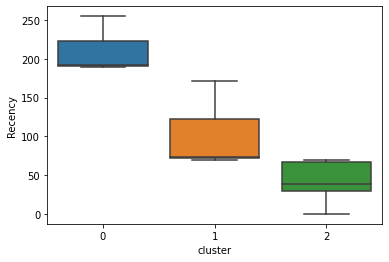

In [220]:
sns.boxplot(x='cluster',y='Recency',data=rfm_normalized)

## F

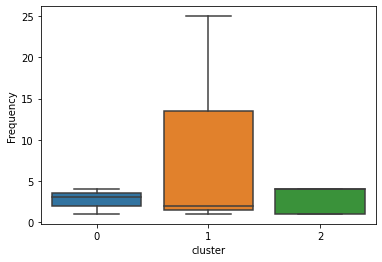

In [221]:
sns.boxplot(x='cluster',y='Frequency',data=rfm_normalized)

## M

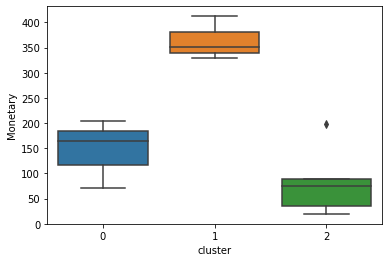

In [222]:
sns.boxplot(x='cluster',y='Monetary',data=rfm_normalized)